In [1]:
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# add parent folder of notebook to path
sys.path.append(os.path.abspath(".."))



In [2]:
import Pipeline.results 
import importlib
from utils.helperfunctions import plot_roc_curve

Decision Tree predicts Team A wins 53.17%, Team B wins 46.83%
LogReg predicts Team A wins 49.76%, Team B wins 50.24%
SVM predicts Team A wins 40.24%, Team B wins 59.76%
MLP predicts Team A wins 48.54%, Team B wins 51.46%


In [ ]:
Pipeline.results.prediction.to_csv("../Prediction.csv", index=False)



In [ ]:
df = pd.read_csv("../Prediction.csv")
df

,posteam_A,Season_A,posteam_B,Season_B,proba_A_wins,winner,predicted_winner_team
0,GB,2011,NO,2009,0.358567,B,NO
1,NE,2016,IND,2009,0.685830,A,NE
2,NO,2009,SF,2011,0.385884,B,SF
3,NE,2010,CAR,2015,0.630304,A,NE
4,CAR,2015,GB,2011,0.513955,A,CAR
5,IND,2009,CAR,2015,0.402158,B,CAR
6,SF,2011,CAR,2015,0.570916,A,SF
7,NE,2011,CAR,2015,0.380922,B,CAR
8,DEN,2012,NE,2016,0.391456,B,NE
9,ATL,2016,DEN,2012,0.442739,B,DEN


In [5]:
Pipeline.results.Bestmatchup

,posteam_A,Season_A,posteam_B,Season_B,InterceptionThrown,InterceptionThrown_B,Fumble,Fumble_B,Touchdown,Touchdown_B,...,FirstDown,FirstDown_B,PassAttempt,PassAttempt_B,PassOutcome,PassOutcome_B,CompletionPercentage,CompletionPercentage_B,win,win_B
0,GB,2011,NO,2009,0.6250,0.8125,0.6875,1.5625,3.8125,3.8750,...,22.7500,23.7500,35.3125,35.3750,23.1875,24.1250,0.641801,0.681609,0.8125,0.8125
1,NE,2016,IND,2009,0.1250,1.2500,1.4375,0.7500,3.2500,3.2500,...,23.9375,24.1875,36.8750,39.2500,23.8750,25.6250,0.642576,0.653875,0.8125,0.8125
2,NO,2009,SF,2011,0.8125,0.3750,1.5625,1.0000,3.8750,2.1875,...,23.7500,21.6250,35.3750,29.8125,24.1250,18.0000,0.681609,0.610676,0.8125,0.8125
3,NE,2010,CAR,2015,0.3125,0.6875,0.4375,0.9375,3.6250,3.5625,...,22.3750,24.7500,33.5625,32.9375,21.5000,19.0625,0.645250,0.580476,0.8125,0.8125
4,CAR,2015,GB,2011,0.6875,0.6250,0.9375,0.6875,3.5625,3.8125,...,24.7500,22.7500,32.9375,35.3125,19.0625,23.1875,0.580476,0.641801,0.8125,0.8125
5,IND,2009,CAR,2015,1.2500,0.6875,0.7500,0.9375,3.2500,3.5625,...,24.1875,24.7500,39.2500,32.9375,25.6250,19.0625,0.653875,0.580476,0.8125,0.8125
6,SF,2011,CAR,2015,0.3750,0.6875,1.0000,0.9375,2.1875,3.5625,...,21.6250,24.7500,29.8125,32.9375,18.0000,19.0625,0.610676,0.580476,0.8125,0.8125
7,NE,2011,CAR,2015,0.8125,0.6875,0.8125,0.9375,3.6875,3.5625,...,26.3750,24.7500,40.0625,32.9375,25.6875,19.0625,0.639820,0.580476,0.8125,0.8125
8,DEN,2012,NE,2016,0.7500,0.1250,1.1250,1.4375,3.4375,3.2500,...,26.6875,23.9375,38.8125,36.8750,25.7500,23.8750,0.670930,0.642576,0.8125,0.8125
9,ATL,2016,DEN,2012,0.5000,0.7500,0.5625,1.1250,3.7500,3.4375,...,24.7500,26.6875,35.4375,38.8125,24.1875,25.7500,0.682063,0.670930,0.7500,0.8125


In [6]:
Pipeline.results.results

[('Decision Tree accuracy', 0.6682926829268293),
 ('LogReg accuracy:', 0.6634146341463415),
 ('SVM accuracy:', 0.6560975609756098),
 ('Best MLP accuracy out of 10 tries:', 0.5926829268292683)]

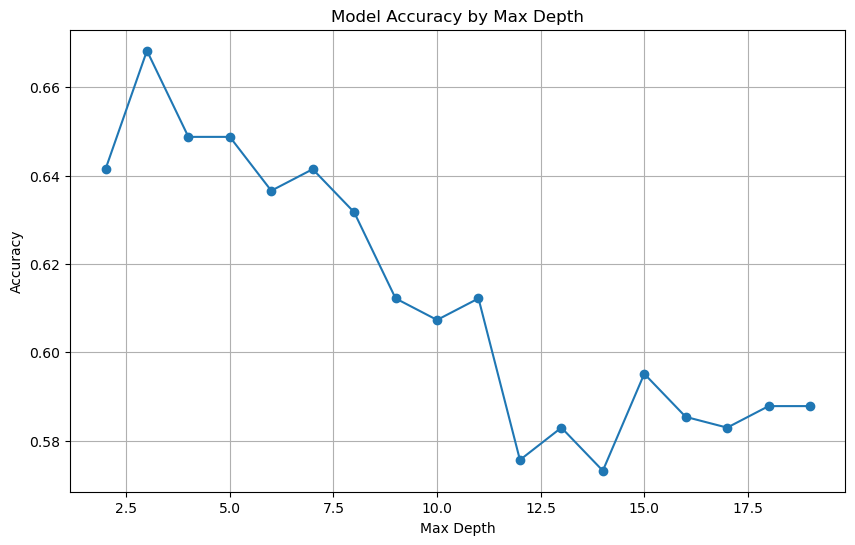

In [7]:
plt.figure(figsize=(10,6))
depths = list(range(2,20))
accuracies = []
for x in depths:
    model = DecisionTreeClassifier(max_depth=x, random_state=42)
    model.fit(Pipeline.results.X_train_scaled, Pipeline.results.y_train)
    acc = accuracy_score(Pipeline.results.y_test, model.predict(Pipeline.results.X_test_scaled))
    accuracies.append(acc)
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Max Depth')
plt.grid(True)
plt.show()

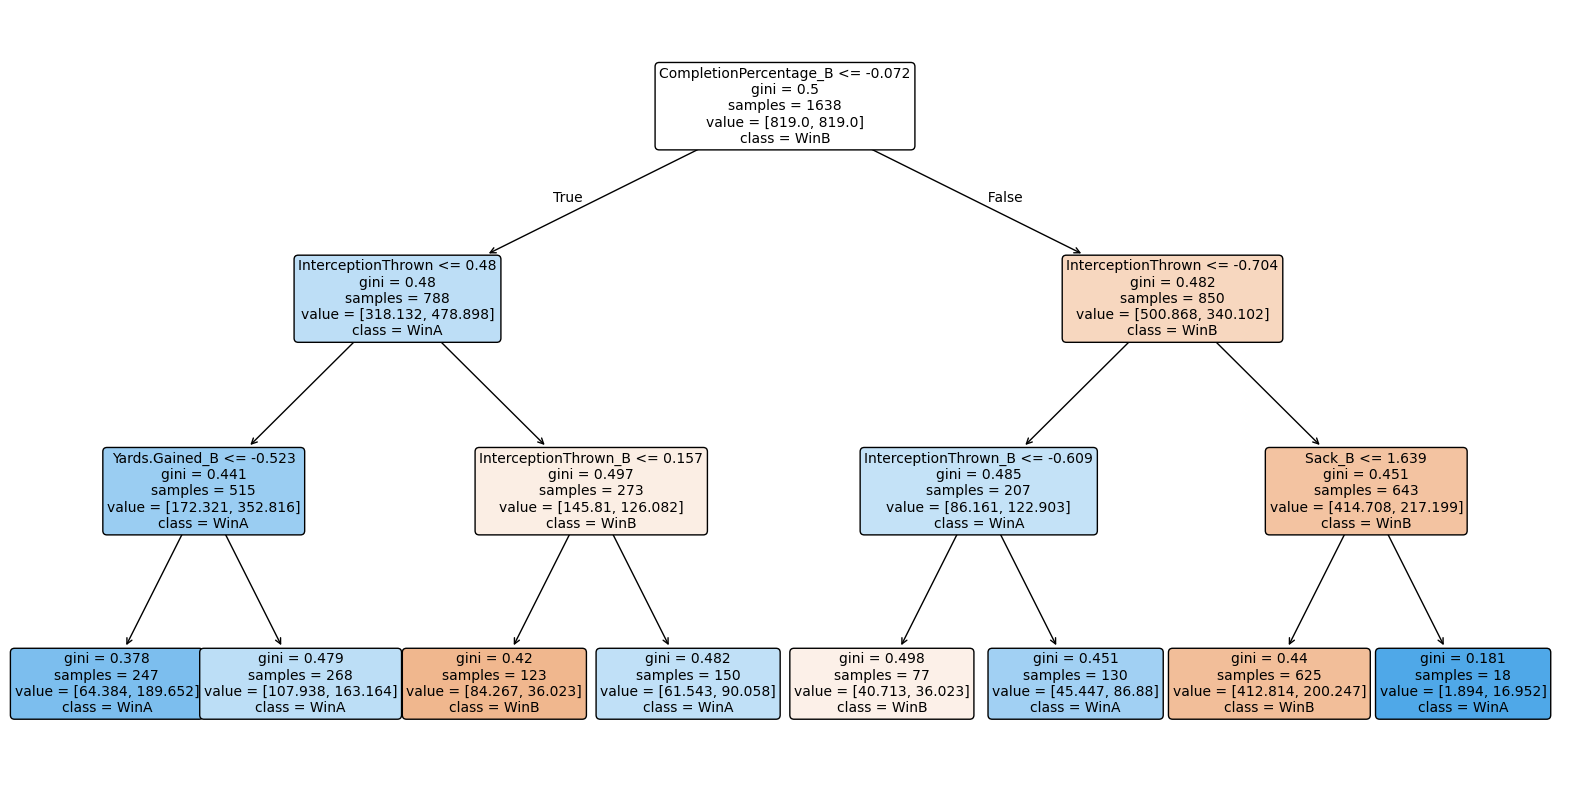

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(
    Pipeline.results.tree,
    feature_names=Pipeline.results.train_cols,
    class_names=['WinB', 'WinA'],
    filled=True,             # Colors nodes by class
    rounded=True,
    fontsize=10
)
plt.show()


In [9]:
feature_importances = pd.Series(Pipeline.results.tree.feature_importances_, index=Pipeline.results.train_cols)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

InterceptionThrown        0.348191
CompletionPercentage_B    0.321055
InterceptionThrown_B      0.152914
Sack_B                    0.122009
Yards.Gained_B            0.055832
Penalty.Yards             0.000000
PassOutcome_B             0.000000
PassAttempt_B             0.000000
FirstDown_B               0.000000
PuntBlocked_B             0.000000
Penalty.Yards_B           0.000000
FieldGoalResult_B         0.000000
FieldGoalResult           0.000000
Fumble                    0.000000
CompletionPercentage      0.000000
PassOutcome               0.000000
PassAttempt               0.000000
FirstDown                 0.000000
Sack                      0.000000
PuntBlocked               0.000000
Yards.Gained              0.000000
Fumble_B                  0.000000
dtype: float64


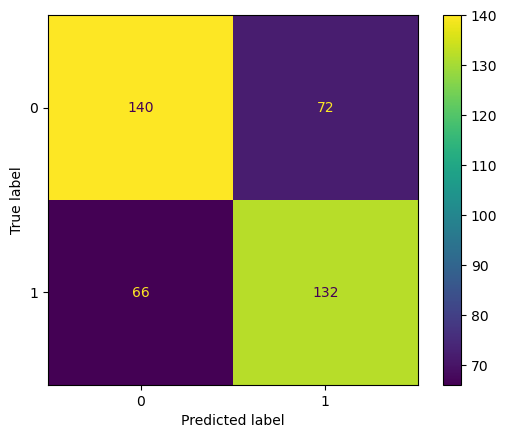

In [10]:
cm = confusion_matrix(Pipeline.results.y_test, Pipeline.results.y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

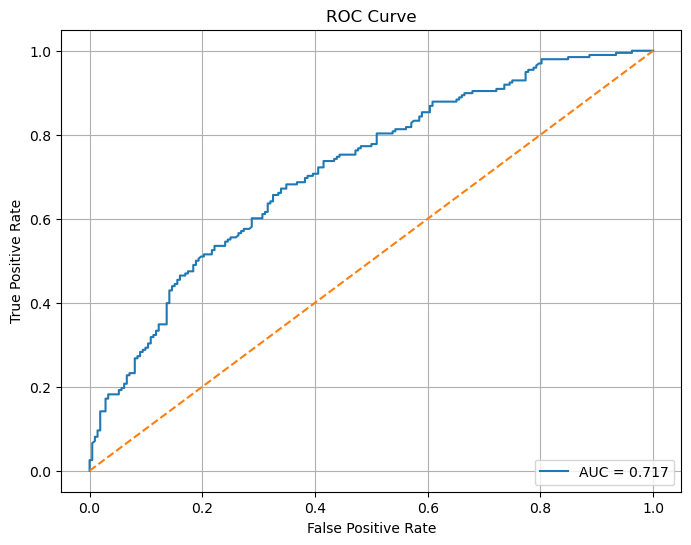

In [11]:
plot_roc_curve( Pipeline.results.best_model, Pipeline.results.X_test_scaled, Pipeline.results.y_test)

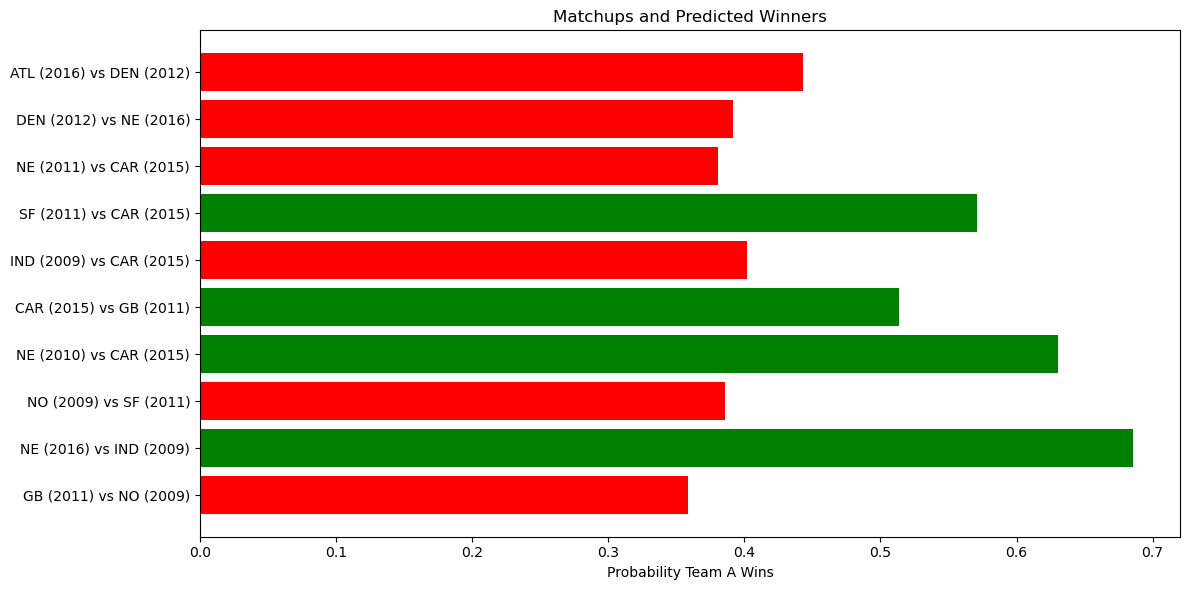

In [12]:




df['matchup'] = df['posteam_A'] + " (" + df['Season_A'].astype(str) + ") vs " + \
                df['posteam_B'] + " (" + df['Season_B'].astype(str) + ")"

plt.figure(figsize=(12, 6))
plt.barh(df['matchup'], df['proba_A_wins'])

# Color bars by predicted winner
colors = ['green' if w == 'A' else 'red' for w in df['winner']]
plt.barh(df['matchup'], df['proba_A_wins'], color=colors)

plt.xlabel("Probability Team A Wins")
plt.title("Matchups and Predicted Winners")
plt.tight_layout()
plt.show()
